In [2]:
import numpy as np

np.random.seed(0)

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
rnd_indices = np.random.permutation(boston.data.shape[0])
train_size = int(boston.data.shape[0] * 0.8)
train_indices = rnd_indices[:train_size]
test_indices = rnd_indices[train_size:]

train_data = boston.data[train_indices, :]
test_data = boston.data[test_indices, :]
train_target = boston.target[train_indices]
test_target = boston.target[test_indices]

In [27]:
print(boston.keys())
#print(boston.data.shape)
#print(boston.target.shape)
#print(train_indices)
print(boston.feature_names[5:7])
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['RM' 'AGE']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways


In [123]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# fit a linear regressor
lin_reg = LinearRegression()
X = train_data[:,5].reshape(-1,1) #to plot 1D list need to reshape and for fitting as well
lin_reg.fit(X, train_target)

LinearRegression()

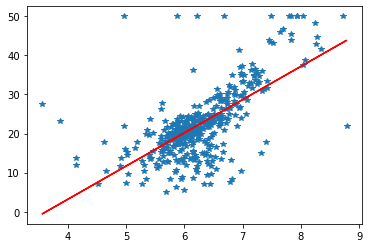

In [125]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(X, train_target, "*")
y_pred = lin_reg.predict(X)
plt.plot(X, y_pred, 'red')

In [83]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# fit a linear regressor
lin_reg = LinearRegression()
lin_reg.fit(train_data, train_target)


LinearRegression()

In [35]:
train_predict = lin_reg.predict(train_data)
test_predict = lin_reg.predict(test_data)
train_rmse = np.sqrt(((train_target - train_predict) ** 2).mean())
test_rmse = np.sqrt(((test_target - test_predict) ** 2).mean())
print("Linear Train RMSE:", train_rmse, "\nLinear Test RMSE:", test_rmse)

Linear Train RMSE: 4.854290583096463 
Linear Test RMSE: 4.060118093883478


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
print("Before\t\tAfter")
for i in range(len(train_data)):
    print(train_data[i][10], "\t", scaled_train_data[i][10]) #10 is the pupil teach ratio data
    
#for i in train_data:
#    print(i[10]) this is train_data[i][10] but in this for loop can't reference scaled_train_data
#print(scaled_train_data[10])

Before		After
16.9 	 -0.7163785977768039
20.2 	 0.8260567164287369
16.4 	 -0.9500809181109767
20.2 	 0.8260567164287369
18.7 	 0.1249497554262185
21.0 	 1.1999804289634137
20.2 	 0.8260567164287369
20.2 	 0.8260567164287369
18.4 	 -0.01527163677428552
20.9 	 1.1532399648965785
20.2 	 0.8260567164287369
20.2 	 0.8260567164287369
20.2 	 0.8260567164287369
20.2 	 0.8260567164287369
14.7 	 -1.7446688072471639
14.8 	 -1.6979283431803287
20.2 	 0.8260567164287369
12.6 	 -2.7262185526506895
16.6 	 -0.8565999899773062
19.2 	 0.3586520757603913
19.6 	 0.5456139320277306
14.7 	 -1.7446688072471639
20.9 	 1.1532399648965785
17.6 	 -0.38919534930896066
17.9 	 -0.24897395710845832
20.2 	 0.8260567164287369
21.0 	 1.1999804289634137
14.7 	 -1.7446688072471639
18.0 	 -0.2022334930416231
17.8 	 -0.2957144211752919
20.2 	 0.8260567164287369
20.2 	 0.8260567164287369
19.1 	 0.31191161169355774
16.6 	 -0.8565999899773062
16.6 	 -0.8565999899773062
20.2 	 0.8260567164287369
20.2 	 0.8260567164287369
20.2 

In [11]:
lin_reg2 = LinearRegression()
lin_reg2.fit(scaled_train_data, train_target)

scaled_test_predict = lin_reg.predict(scaled_test_data)
scaled_test_rmse = np.sqrt(((test_target - scaled_test_predict) ** 2).mean())

scaled_train_predict = lin_reg.predict(scaled_train_data)
scaled_train_rmse = np.sqrt(((train_target - scaled_train_predict) ** 2).mean())
print("Scaled Linear Train RMSE:", scaled_train_rmse)
print("Scaled Linear Test RMSE:", scaled_test_rmse)

Scaled Linear Train RMSE: 22.74154226875535
Scaled Linear Test RMSE: 21.84063349577531


In [12]:
def rmse(x, y):
    return np.sqrt(((x - y) ** 2).mean())

In [13]:
from sklearn.linear_model import Lasso, Ridge
# fit a ridge regressor
alpha_ridge = 1
ridge_reg = Ridge(alpha_ridge, solver="cholesky")
ridge_reg.fit(train_data, train_target)

ridge_train_predict = ridge_reg.predict(train_data)
ridge_test_predict = ridge_reg.predict(test_data)
print("Ridge Train RMSE:", rmse(train_target, ridge_train_predict))
print("Ridge Test RMSE:", rmse(test_target, ridge_test_predict))

# fit a lasso regressor
alpha_lasso = 1
lasso_reg = Lasso(alpha_lasso)
lasso_reg.fit(train_data, train_target)
lasso_train_predict = lasso_reg.predict(train_data)
lasso_test_predict = lasso_reg.predict(test_data)
print("\nLasso Train RMSE:", rmse(train_target, lasso_train_predict))
print("Lasso Test RMSE:", rmse(test_target, lasso_test_predict))

Ridge Train RMSE: 4.874044350170758
Ridge Test RMSE: 4.115561183052352

Lasso Train RMSE: 5.323133981182158
Lasso Test RMSE: 5.422054114286457


In [38]:
from sklearn.linear_model import Lasso, Ridge
# fit a ridge regressor
alpha_ridge = 4
ridge_reg2 = Ridge(alpha_ridge, solver="cholesky")
ridge_reg2.fit(scaled_train_data, train_target)

ridge2_scaled_train_predict = ridge_reg2.predict(scaled_train_data)
ridge2_scaled_test_predict = ridge_reg2.predict(scaled_test_data)
print("Scaled Ridge Train RMSE:", rmse(train_target, ridge2_scaled_train_predict))
print("Scaled Ridge Test RMSE:", rmse(test_target, ridge2_scaled_test_predict))

# fit a lasso regressor
alpha_lasso = 0.1
lasso_reg2 = Lasso(alpha_lasso)
lasso_reg2.fit(scaled_train_data, train_target)
lasso2_scaled_train_predict = lasso_reg2.predict(scaled_train_data)
lasso2_scaled_test_predict = lasso_reg2.predict(scaled_test_data)
print("\nScaled Lasso Train RMSE:", rmse(train_target, lasso2_scaled_train_predict))
print("Scaled Lasso Test RMSE:", rmse(test_target, lasso2_scaled_test_predict))

Scaled Ridge Train RMSE: 4.85718165861117
Scaled Ridge Test RMSE: 4.041640375268793

Scaled Lasso Train RMSE: 4.904090777003672
Scaled Lasso Test RMSE: 4.098634382950761


In [57]:
from sklearn.svm import LinearSVR
import warnings
warnings.filterwarnings('ignore')

Test_rmse = []

for i in range(100):
    epsilon_svm = round(i*0.1,2)
    svm_reg = LinearSVR(epsilon_svm)
    svm_reg.fit(train_data, train_target)
    svm_reg_train_predict = svm_reg.predict(train_data)
    svm_reg_test_predict = svm_reg.predict(test_data)
    
    #print("=" * 20)
    #print("Epsilon: ", epsilon_svm)
    #print("SVM Train RMSE:", rmse(train_target, svm_reg_train_predict))
    #print("SVM Test RMSE:", rmse(test_target, svm_reg_test_predict))
    #print("\nSVM Difference", rmse(test_target, svm_reg_test_predict) - rmse(train_target, svm_reg_train_predict))
    Test_rmse.append(rmse(test_target, svm_reg_test_predict))

print(Test_rmse.index(min(Test_rmse))*0.1, min(Test_rmse))

0.2 4.926077444857416


In [52]:
n = 100
data = 12 * np.random.rand(n, 1) - 3.9
target = 0.09 * (data**3) + 0.3 * (data**2) - 4.1 * data - 2.4 + 4.79 * np.random.randn(n, 1)

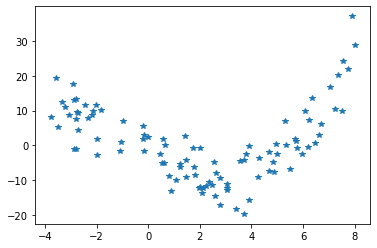

In [17]:
plt.figure()
plt.plot(data, target, "*")

LinearRegression()

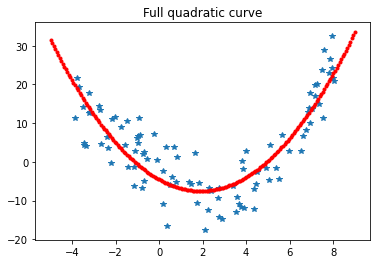

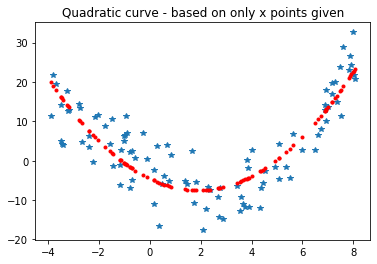

In [183]:
from sklearn.preprocessing import PolynomialFeatures

#Plotting practice regression based on above data
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_train_data = poly_features.fit_transform(data)
lin_reg = LinearRegression()
lin_reg.fit(poly_train_data, target)

#To get smooth curve make new lots of x values to predict on
x = np.linspace(-5,9,200).reshape(-1,1)
x_poly = poly_features.fit_transform(x)
y_pred2 = lin_reg.predict(x_poly)

plt.figure()
plt.title("Full quadratic curve")
plt.plot(data, target, "*")
plt.plot(x, y_pred2, "r.")

#Prediction on the x values we were given
y_pred = lin_reg.predict(poly_train_data)
plt.figure()
plt.title("Quadratic curve - based on only x points given")
plt.plot(data, target, "*")
plt.plot(data, y_pred, "r.")

#using training data
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_train_data = poly_features.fit_transform(train_data)
lin_reg = LinearRegression()
lin_reg.fit(poly_train_data, train_target)

In [19]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_train_data = poly_features.fit_transform(train_data)
lin_reg = LinearRegression()
lin_reg.fit(poly_train_data, train_target)
lin_train_predict = lin_reg.predict(poly_train_data)
lin_test_predict = lin_reg.predict(poly_train_data)

alpha_ridge_poly = 2
ridge_reg3 = Ridge(alpha_ridge, solver="cholesky")
ridge_reg3.fit(poly_train_data, train_target)

ridge3_train_predict = ridge_reg3.predict(poly_train_data)
print("Ridge Train RMSE:", rmse(train_target, ridge3_train_predict))

# fit a lasso regressor
alpha_lasso = 0.1
lasso_reg3 = Lasso(alpha_lasso)
lasso_reg3.fit(poly_train_data, train_target)
lasso3_train_predict = lasso_reg3.predict(poly_train_data)
print("\nLasso Train RMSE:", rmse(train_target, lasso3_train_predict))

Ridge Train RMSE: 2.6610638203036285

Lasso Train RMSE: 2.960960606280627


C:\Users\borin\anaconda3\envs\COMP3222Wk1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2034.4921457837054, tolerance: 3.2275003242574254
  model = cd_fast.enet_coordinate_descent(


In [20]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_reg.fit(train_data, np.ravel(train_target))

SVR(C=100, degree=2, kernel='poly')

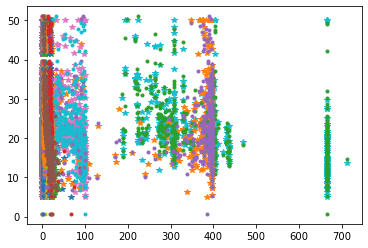

In [21]:
plt.figure()
plt.plot(train_data, train_target, "*", train_data, lin_train_predict, ".")

ValueError: x and y must have same first dimension, but have shapes (102, 13) and (404,)

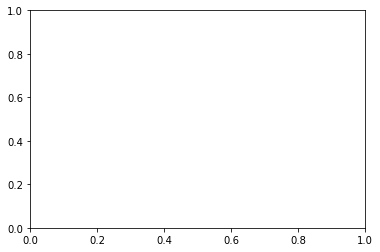

In [22]:
plt.figure()
plt.plot(train_data, train_target, "*", train_data, lin_train_predict, ".", test_data, test_target, "*", test_data, lin_test_predict, ".")